In [1]:
%pip install -r requirements.txt

  Using cached statsmodels-0.14.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
Using cached statsmodels-0.14.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [39]:
# General imports
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('dataset.csv')

# Display basic information about the dataset
print(df.info())

# Show the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get unique values for categorical columns
print("Unique Soil Types:", df['Soil_Type'].nunique())
print("Unique Wilderness Areas:", df['Wilderness_Area'].nunique())
print("Unique Vegetation Types:", df['Vegetation_Type'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  4860 non-null   int64  
 1   Altitude                            4860 non-null   int64  
 2   Slope_Orientation                   4860 non-null   int64  
 3   Slope                               4860 non-null   int64  
 4   Horizontal_Distance_To_Water        4860 non-null   int64  
 5   Vertical_Distance_To_Water          4860 non-null   int64  
 6   Horizontal_Distance_To_Roadways     4860 non-null   int64  
 7   Shadow_Index_9h                     4860 non-null   int64  
 8   Shadow_Index_12h                    4860 non-null   int64  
 9   Shadow_Index_15h                    4860 non-null   int64  
 10  Horizontal_Distance_To_Fire_Points  4860 non-null   int64  
 11  Canopy_Density                      4860 no

In [4]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Remove 'Id' column
df = df.drop('Id', axis=1)

# Separate features and target
X = df.drop('Vegetation_Type', axis=1)
y = df['Vegetation_Type']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Fit and transform the features
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
numeric_feature_names = numeric_features.tolist()
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
feature_names = numeric_feature_names + categorical_feature_names

# Create a new dataframe with preprocessed features
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Print the first few rows of the preprocessed features
print("\nFirst few rows of preprocessed features:")
print(X_preprocessed_df.head())

# Print unique values in the target variable
print("\nUnique values in the target variable:")
print(y.unique())



Training set shape: (3888, 47)
Testing set shape: (972, 47)

First few rows of preprocessed features:
   Altitude  Slope_Orientation     Slope  Horizontal_Distance_To_Water  \
0  0.035767           1.732664 -1.556780                     -1.119401   
1  0.128069           1.511905  0.924673                     -0.675595   
2  0.028844          -0.796862 -1.669573                     -0.962763   
3  0.088841           1.438319  0.811880                     -0.962763   
4  0.543429          -1.339561 -0.428847                     -0.649488   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                   -0.838210                         0.315010   
1                   -0.098457                         1.074492   
2                   -0.838210                         1.188192   
3                   -0.511342                         1.147319   
4                   -0.734988                         2.711615   

   Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  

Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      0.99       439
      Type_3       0.94      0.80      0.86       323
      Type_4       0.76      0.94      0.84       210

    accuracy                           0.92       972
   macro avg       0.90      0.91      0.90       972
weighted avg       0.93      0.92      0.92       972



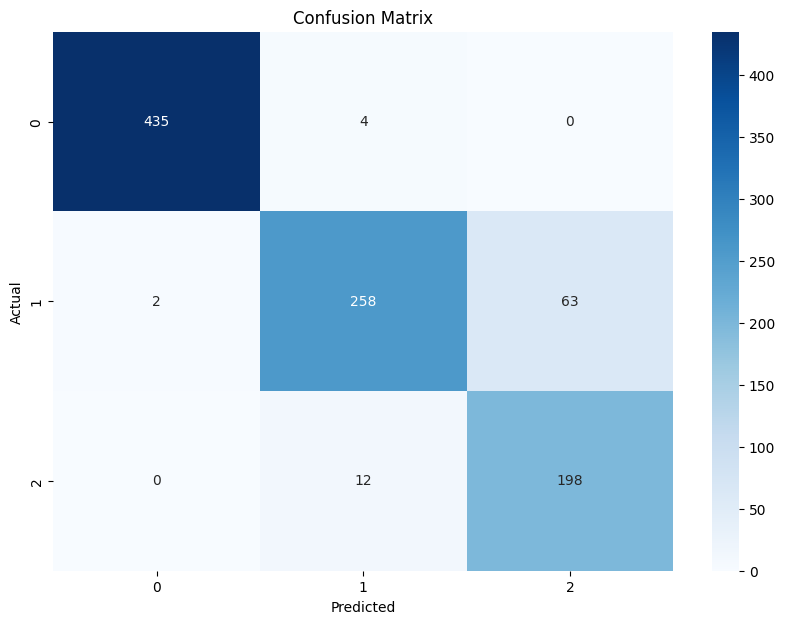

Accuracy: 0.9167

Top 10 most important features:


NameError: name 'feature_names' is not defined

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print the accuracy
accuracy = qda.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Print the top 10 most important features
feature_importance = np.abs(qda.means_[0] - qda.means_[1])
top_features = np.argsort(feature_importance)[-10:]
print("\nTop 10 most important features:")
for i in top_features:
    print(f"{feature_names[i]}: {feature_importance[i]:.4f}")

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('dataset.csv')

# Remove 'Id' column
df = df.drop('Id', axis=1)

# Separate features and target
X = df.drop('Vegetation_Type', axis=1)
y = df['Vegetation_Type']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create a pipeline with preprocessor and PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Fit and transform the features
X_preprocessed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Initialize and train the QDA model with regularization
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = qda.score(X_test, y_test)
print(f"\nAccuracy: {accuracy:.4f}")

# Print the number of components retained by PCA
print(f"\nNumber of components retained by PCA: {pca.n_components_}")

Training set shape: (3888, 15)
Testing set shape: (972, 15)

Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      0.99       439
      Type_3       0.91      0.78      0.84       323
      Type_4       0.73      0.91      0.81       210

    accuracy                           0.90       972
   macro avg       0.88      0.89      0.88       972
weighted avg       0.91      0.90      0.90       972


Accuracy: 0.9012

Number of components retained by PCA: 15


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('dataset.csv')

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Remove 'Id' column
df = df.drop('Id', axis=1)

#df['Vegetation_Type'] =  
df['Vegetation_Type'] = df['Vegetation_Type'].str.replace('Type_', '').astype(int)

# Separate features and target
y = df['Vegetation_Type']
X = df.drop('Vegetation_Type', axis=1)


# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create a pipeline with preprocessor and PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Fit and transform the features
X_preprocessed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Initialize and train the QDA model with regularization
qda = QuadraticDiscriminantAnalysis(reg_param=0.2)
qda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = qda.score(X_test, y_test)
print(f"\nAccuracy: {accuracy:.4f}")

# Print the number of components retained by PCA
print(f"\nNumber of components retained by PCA: {pca.n_components_}")

Training set shape: (3888, 15)
Testing set shape: (972, 15)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99       439
           3       0.89      0.79      0.84       323
           4       0.74      0.90      0.81       210

    accuracy                           0.90       972
   macro avg       0.88      0.89      0.88       972
weighted avg       0.91      0.90      0.90       972


Accuracy: 0.8981

Number of components retained by PCA: 15


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('dataset.csv')

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Remove 'Id' column
df = df.drop('Id', axis=1)

# Convert 'Vegetation_Type' to numeric
df['Vegetation_Type'] = df['Vegetation_Type'].str.replace('Type_', '').astype(int)

# Separate features and target
y = df['Vegetation_Type']
X = df.drop('Vegetation_Type', axis=1)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Get all unique categories for each categorical feature
category_encodings = {feature: X[feature].unique() for feature in categorical_features}

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore', categories=[category_encodings[feature] for feature in categorical_features]), categorical_features)
    ])

# Create a pipeline with preprocessor and PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create full pipeline including QDA
full_pipeline = Pipeline([
    ('preprocess_pca', pipeline),
    ('qda', QuadraticDiscriminantAnalysis())
])

# Define parameter grid
param_grid = {
    'qda__reg_param': np.logspace(-5, 0, 20)
}

# Perform grid search
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = best_model.score(X_test, y_test)
print(f"\nAccuracy: {accuracy:.4f}")

# Print the shapes of training and testing sets
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Print the number of components retained by PCA
pca = best_model.named_steps['preprocess_pca'].named_steps['pca']
print(f"\nNumber of components retained by PCA: {pca.n_components_}")

Best parameters: {'qda__reg_param': np.float64(0.007847599703514606)}
Best cross-validation score: 0.9135829917320919

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       432
           3       0.95      0.80      0.86       324
           4       0.76      0.94      0.84       216

    accuracy                           0.92       972
   macro avg       0.90      0.91      0.90       972
weighted avg       0.93      0.92      0.92       972


Accuracy: 0.9167

Training set shape: (3888, 16)
Testing set shape: (972, 16)

Number of components retained by PCA: 15


In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def load_and_preprocess_data(file_path='dataset.csv'):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Shuffle the data
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Remove 'Id' column
    df = df.drop('Id', axis=1)

    # Convert 'Vegetation_Type' to numeric
    df['Vegetation_Type'] = df['Vegetation_Type'].str.replace('Type_', '').astype(int)

    # Separate features and target
    y = df['Vegetation_Type']
    X = df.drop('Vegetation_Type', axis=1)

    # Identify numeric and categorical columns
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), categorical_features)
        ])

    # Create a pipeline with preprocessor
    pipeline = Pipeline([
        ('preprocessor', preprocessor)
    ])

    # Fit the pipeline and transform the data
    X_processed = pipeline.fit_transform(X)

    # Get feature names after preprocessing
    numeric_feature_names = numeric_features.tolist()
    categorical_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
    feature_names = numeric_feature_names + categorical_feature_names

    # Convert to DataFrame
    X_processed = pd.DataFrame(X_processed, columns=feature_names)

    print("Data loaded and preprocessed successfully.")
    print(f"Shape of X: {X_processed.shape}")
    print(f"Shape of y: {y.shape}")
    print(f"Number of numeric features: {len(numeric_features)}")
    print(f"Number of categorical features: {len(categorical_features)}")

    return X_processed, y, numeric_features, categorical_features, pipeline

# Usage example:
# X, y, numeric_features, categorical_features, preprocessor = load_and_preprocess_data()

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load and preprocess the data (assuming you've already done this)
# If not, include the data loading and preprocessing steps here

X, y, numeric_features, categorical_features, preprocessor = load_and_preprocess_data()

# Create QDA model
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)  

# 1. Holdout Method
def holdout_method(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)
    return accuracy_score(y_test, y_pred)

# 2. Cross Validation
def cross_validation(X, y, k):
    return np.mean(cross_val_score(qda, X, y, cv=k))

# 3. Leave One Out Cross Validation
def loocv(X, y):
    loo = LeaveOneOut()
    scores = cross_val_score(qda, X, y, cv=loo)
    return np.mean(scores)

# 4. Bootstrap
def bootstrap(X, y, n_iterations=1000, sample_size=0.8):
    scores = []
    for _ in range(n_iterations):
        # Random sampling with replacement
        indices = np.random.randint(0, len(X), size=int(len(X)*sample_size))
        X_sample, y_sample = X.iloc[indices], y.iloc[indices]
        
        # Out-of-bag samples
        oob_indices = list(set(range(len(X))) - set(indices))
        X_oob, y_oob = X.iloc[oob_indices], y.iloc[oob_indices]
        
        qda.fit(X_sample, y_sample)
        y_pred = qda.predict(X_oob)
        scores.append(accuracy_score(y_oob, y_pred))
    return np.mean(scores)

# Apply all methods
print("Holdout Method Accuracy:", holdout_method(X, y))
print("5-fold Cross Validation Accuracy:", cross_validation(X, y, 5))
print("10-fold Cross Validation Accuracy:", cross_validation(X, y, 10))
print("Leave One Out Cross Validation Accuracy:", loocv(X, y))
print("Bootstrap Accuracy:", bootstrap(X, y))

Data loaded and preprocessed successfully.
Shape of X: (4860, 47)
Shape of y: (4860,)
Number of numeric features: 14
Number of categorical features: 2
Holdout Method Accuracy: 0.9135802469135802
5-fold Cross Validation Accuracy: 0.9154320987654321
10-fold Cross Validation Accuracy: 0.9152263374485596
Leave One Out Cross Validation Accuracy: 0.9156378600823045
Bootstrap Accuracy: 0.9143899271384177


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

def load_and_preprocess_data(file_path='dataset.csv'):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Shuffle the data
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Remove 'Id' column
    df = df.drop('Id', axis=1)

    # Convert 'Vegetation_Type' to numeric
    df['Vegetation_Type'] = df['Vegetation_Type'].str.replace('Type_', '').astype(int)

    # Separate features and target
    y = df['Vegetation_Type']
    X = df.drop('Vegetation_Type', axis=1)

    # Identify numeric and categorical columns
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), categorical_features)
        ])

    # Create a pipeline with preprocessor
    pipeline = Pipeline([
        ('preprocessor', preprocessor)
    ])

    # Fit the pipeline and transform the data
    X_processed = pipeline.fit_transform(X)

    # Get feature names after preprocessing
    numeric_feature_names = numeric_features.tolist()
    categorical_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
    feature_names = numeric_feature_names + categorical_feature_names

    # Convert to DataFrame
    X_processed = pd.DataFrame(X_processed, columns=feature_names)

    print("Data loaded and preprocessed successfully.")
    print(f"Shape of X: {X_processed.shape}")
    print(f"Shape of y: {y.shape}")
    print(f"Number of numeric features: {len(numeric_features)}")
    print(f"Number of categorical features: {len(categorical_features)}")

    return X_processed, y, numeric_features, categorical_features, pipeline

# Load and preprocess the data
X, y, numeric_features, categorical_features, preprocessor = load_and_preprocess_data()

# Create a pipeline with StandardScaler and RidgeClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeClassifier(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': np.logspace(-3, 3, 7)
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 1. Holdout Method
def holdout_method(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    print("Best parameters:", grid_search.best_params_)
    return accuracy_score(y_test, y_pred)

# 2. Cross Validation
def cross_validation(X, y, k):
    grid_search.fit(X, y)
    return np.mean(cross_val_score(grid_search.best_estimator_, X, y, cv=k))

# 3. Leave One Out Cross Validation
def loocv(X, y):
    grid_search.fit(X, y)
    loo = LeaveOneOut()
    scores = cross_val_score(grid_search.best_estimator_, X, y, cv=loo)
    return np.mean(scores)

# 4. Bootstrap
def bootstrap(X, y, n_iterations=1000, sample_size=0.8):
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    scores = []
    for _ in range(n_iterations):
        indices = np.random.randint(0, len(X), size=int(len(X)*sample_size))
        X_sample, y_sample = X.iloc[indices], y.iloc[indices]
        oob_indices = list(set(range(len(X))) - set(indices))
        X_oob, y_oob = X.iloc[oob_indices], y.iloc[oob_indices]
        
        best_model.fit(X_sample, y_sample)
        y_pred = best_model.predict(X_oob)
        scores.append(accuracy_score(y_oob, y_pred))
    return np.mean(scores)

# Apply all methods
print("Holdout Method Accuracy:", holdout_method(X, y))
print("5-fold Cross Validation Accuracy:", cross_validation(X, y, 5))
print("10-fold Cross Validation Accuracy:", cross_validation(X, y, 10))
print("Leave One Out Cross Validation Accuracy:", loocv(X, y))
print("Bootstrap Accuracy:", bootstrap(X, y))

# Print feature importances from Ridge Regression
best_model = grid_search.best_estimator_
ridge_coef = best_model.named_steps['ridge'].coef_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(ridge_coef[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 most important features:")
print(feature_importance.head(10))

Data loaded and preprocessed successfully.
Shape of X: (4860, 47)
Shape of y: (4860,)
Number of numeric features: 14
Number of categorical features: 2
Best parameters: {'ridge__alpha': np.float64(10.0)}
Holdout Method Accuracy: 0.9156378600823045
5-fold Cross Validation Accuracy: 0.9063786008230453
10-fold Cross Validation Accuracy: 0.9067901234567902
Leave One Out Cross Validation Accuracy: 0.9059670781893004
Bootstrap Accuracy: 0.9034658115795206

Top 10 most important features:
              feature  importance
30  Soil_Type_Type_29    0.468665
26  Soil_Type_Type_23    0.427512
25  Soil_Type_Type_22    0.363493
34  Soil_Type_Type_32    0.321384
35  Soil_Type_Type_33    0.311878
33  Soil_Type_Type_31    0.279126
27  Soil_Type_Type_24    0.248766
32  Soil_Type_Type_30    0.211742
37  Soil_Type_Type_38    0.201968
38  Soil_Type_Type_39    0.192008
